In [1]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Dataset 1: India Exchange Rate Dataset

In [3]:
df = pd.read_excel(r'/content/sample_data/India_Exchange_Rate_Dataset.xls',parse_dates=True)
df.head()

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


### 1) Multiple Box Plot

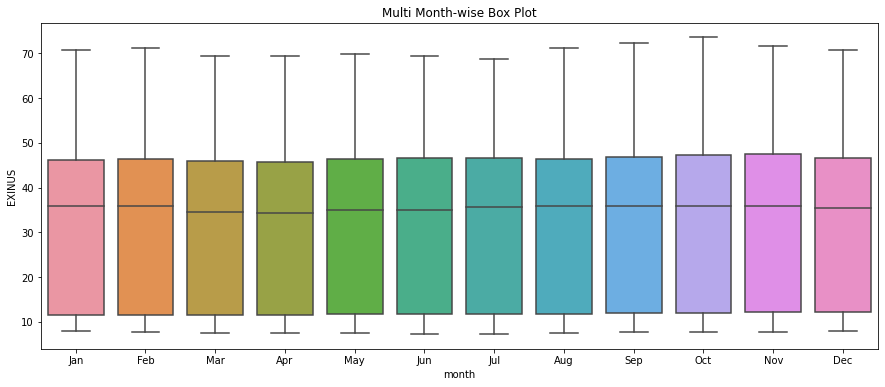

In [4]:
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()


### 2) Seasonality using auto correlation

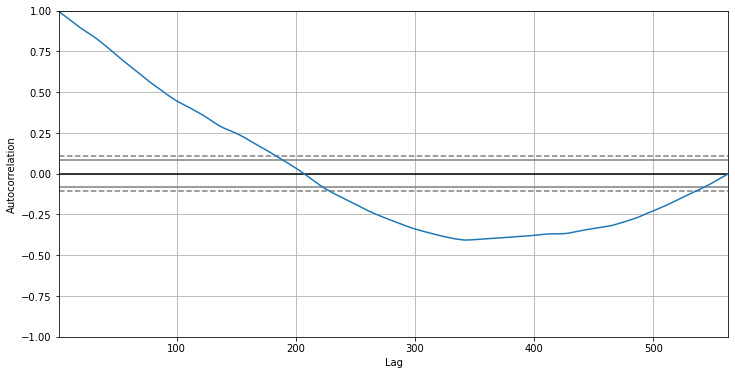

In [5]:
plt.rcParams.update({'figure.figsize':(12,6)})
autocorrelation_plot(df.EXINUS.tolist())

### 3) Deseasoning the time series

#### a) Additive model

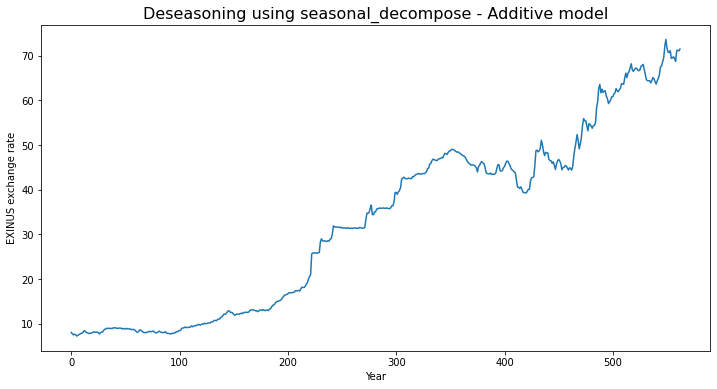

In [6]:
# Additive model
result_mul = seasonal_decompose(df['EXINUS'], model='additive',freq=6)
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Additive model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

#### b) Multiplicative model

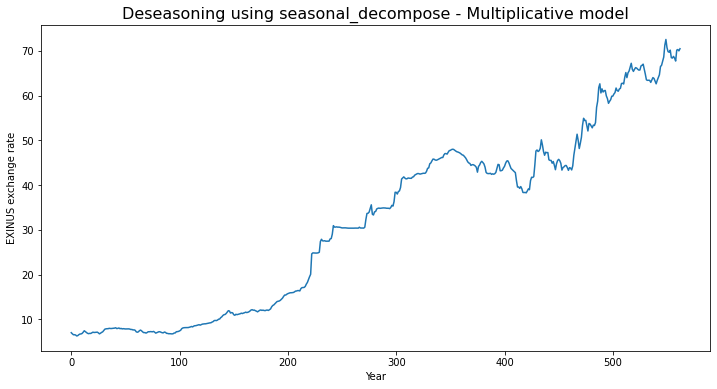

In [7]:
# Multiplicative model
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative',freq=6)
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Multiplicative model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### 4) Seasonal Decomposition

#### a) From Scratch

In [8]:
df = df["EXINUS"]
df.head()

0    8.0041
1    7.7538
2    7.5465
3    7.5462
4    7.4927
Name: EXINUS, dtype: float64

Text(0.5, 1.0, 'Trend against Time')

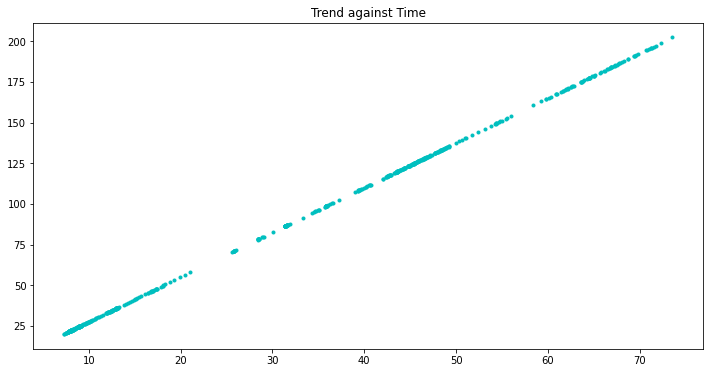

In [9]:
#create the trend component
T_Series = df
Trend = T_Series * 2.75

#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")

Text(0.5, 1.0, 'Seasonality against Time')

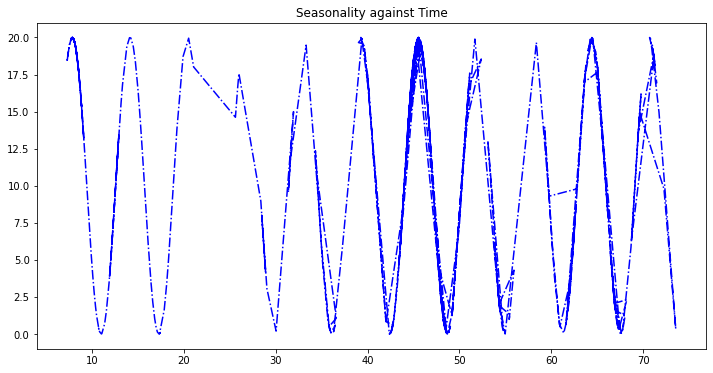

In [10]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

#plot the seasonality trend
plt.plot(T_Series,  seasonality, 'b-.')
plt.title("Seasonality against Time")

Text(0.5, 1.0, 'Residuals against Time')

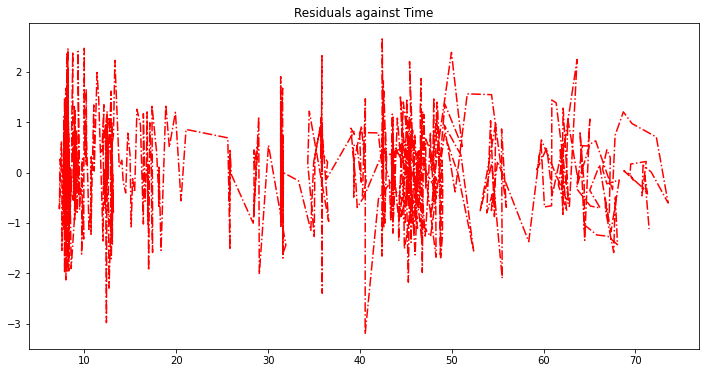

In [11]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")

Text(0.5, 1.0, 'Additive Time Series')

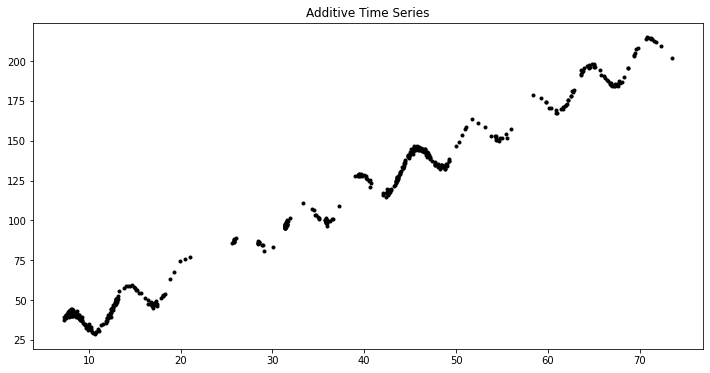

In [12]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")

Text(0.5, 1.0, 'Multiplicative Time Series')

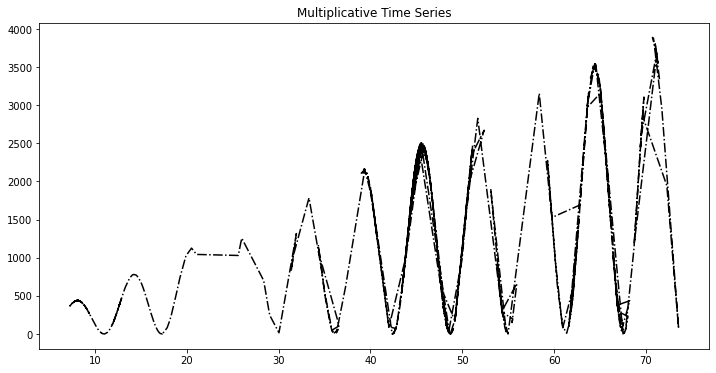

In [13]:
ignored_residual = np.ones_like(residual)

multiplicative_Tmodel = Trend * seasonality * ignored_residual

plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")

#### b) Using libraries

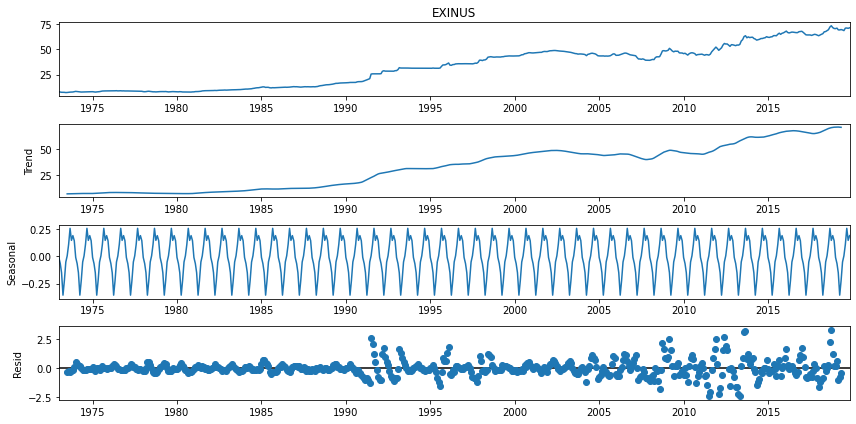

In [14]:
df = pd.read_excel(r'/content/sample_data/India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
result = seasonal_decompose(df['EXINUS'], model='add') 
result.plot();

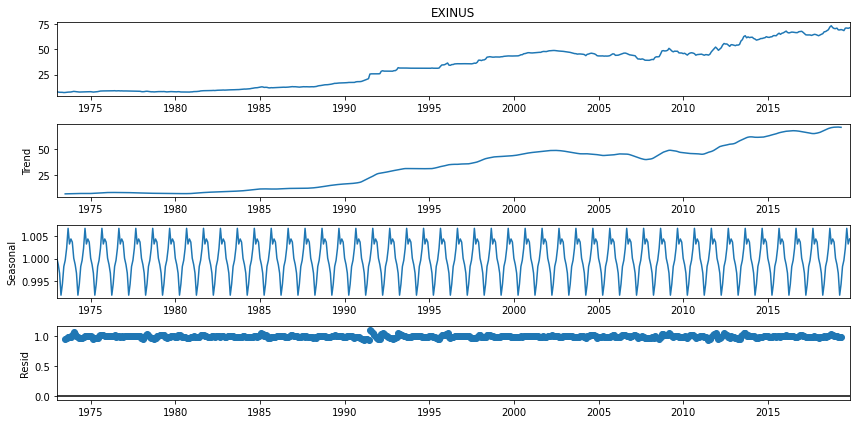

In [15]:
result = seasonal_decompose(df['EXINUS'], model='mul') 
result.plot();

## Dataset 2: Minimum Temperatures

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### 1) Multiple Box Plot

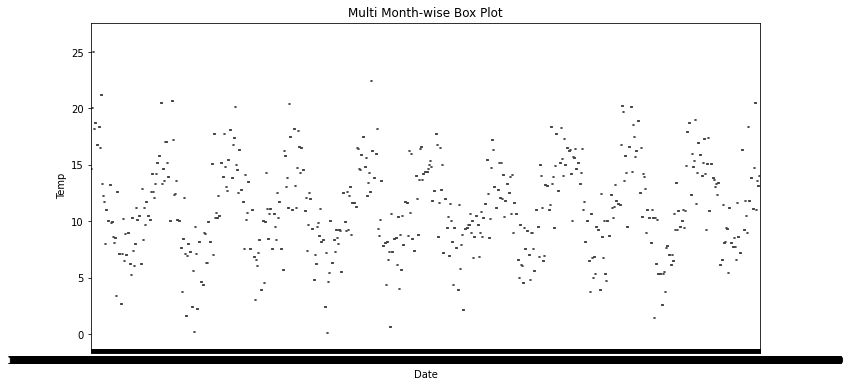

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

plt.figure(figsize=(12,6))
sns.boxplot(x='Date', y='Temp', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### 2) Seasonality using auto correlation

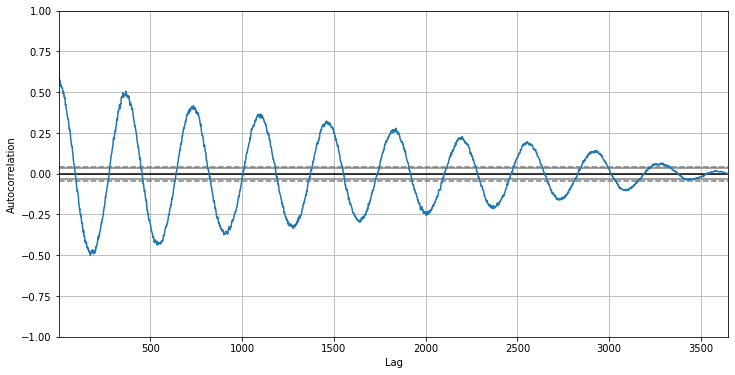

In [18]:
plt.figure(figsize=(12,6))
autocorrelation_plot(df.Temp.tolist())
plt.show()

### 3) Deseasoning the time series

#### a) Additive model

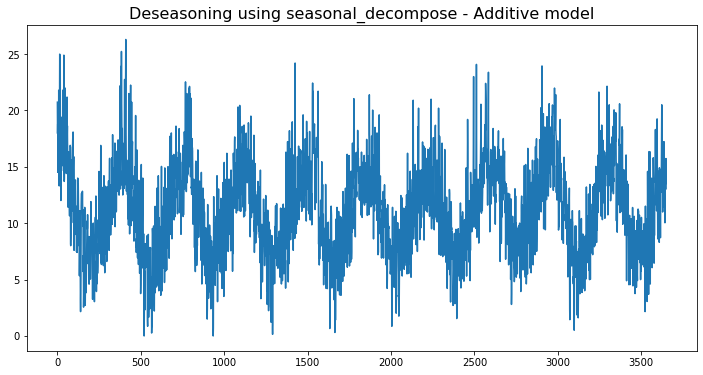

In [19]:
# Additive model
result_mul = seasonal_decompose(df['Temp'], model='additive',freq=6)
deseason = df['Temp'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Additive model', fontsize=16)
plt.show()

#### b) Multiplicative model

Multiplicative seasonality is not appropriate for zero and negative values. As the dataset contains such values, we cannot apply multiplicative model to it.

### 4) Seasonal Decomposition

#### a) From Scratch

In [20]:
df = df["Temp"]
df.head()

0    20.7
1    17.9
2    18.8
3    14.6
4    15.8
Name: Temp, dtype: float64

Text(0.5, 1.0, 'Trend against Time')

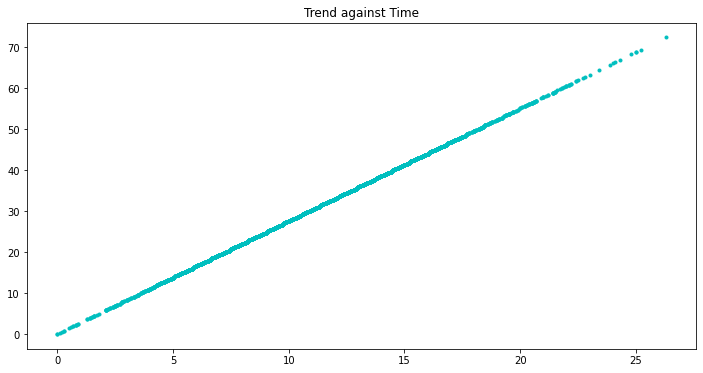

In [21]:
#create the trend component
T_Series = df
Trend = T_Series * 2.75

#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")

Text(0.5, 1.0, 'Seasonality against Time')

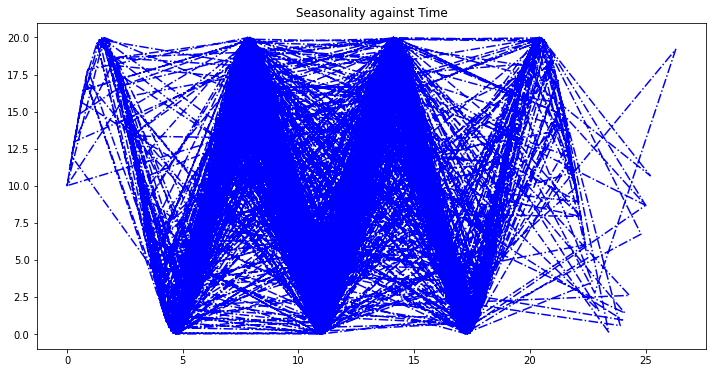

In [22]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

#plot the seasonality trend
plt.plot(T_Series,  seasonality, 'b-.')
plt.title("Seasonality against Time")

Text(0.5, 1.0, 'Residuals against Time')

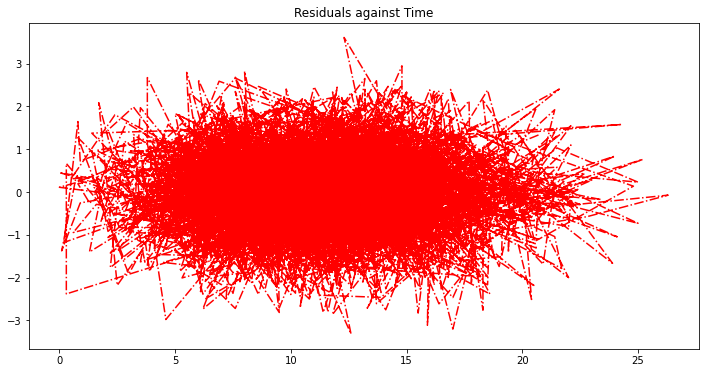

In [23]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")

Text(0.5, 1.0, 'Additive Time Series')

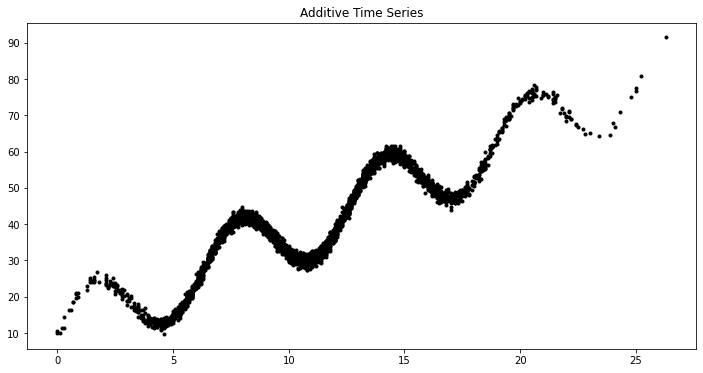

In [24]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")

Text(0.5, 1.0, 'Multiplicative Time Series')

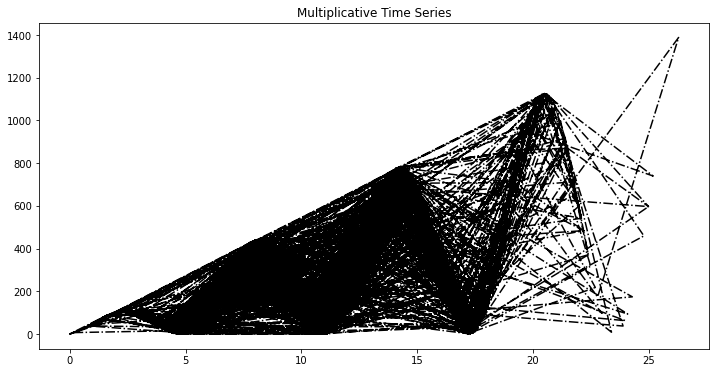

In [25]:
ignored_residual = np.ones_like(residual)

multiplicative_Tmodel = Trend * seasonality * ignored_residual

plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")

#### b) Using libraries

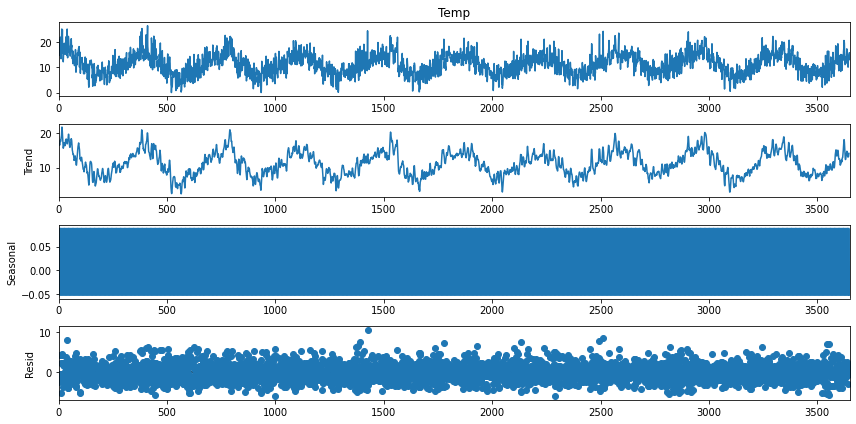

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
result = seasonal_decompose(df['Temp'], model='add',freq=6) 
result.plot();

## Dataset 3: Facebook Stock Market Performance

In [27]:
df = pd.read_csv(r'/content/sample_data/FB.csv',parse_dates=True)
df.head()

,Date,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,...,1,0,0,0,0,0,0,0,0,1
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,...,1,0,0,1,0,1,0,0,0,0
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,...,0,1,1,1,0,0,0,0,1,0
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,...,0,1,0,0,0,0,0,0,1,0
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,...,0,0,1,1,1,1,1,0,1,0


### 1) Multiple Box Plot

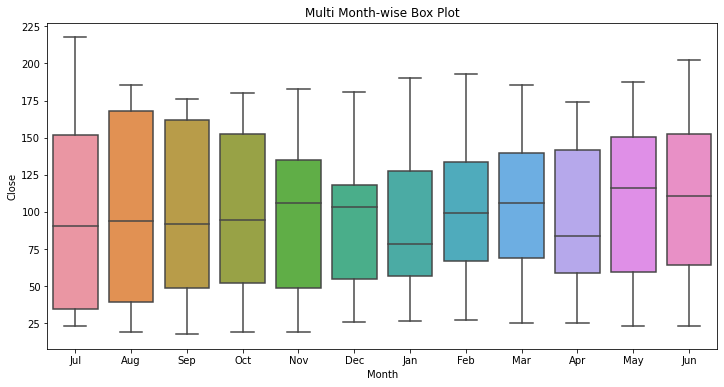

In [28]:
df['Date'] = pd.to_datetime(df.Date, errors='coerce')
# df['Date'] = df['Date'].dt.strftime('%b-%b-%b')
df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = [d.year for d in df.Date]
df['Month'] = [d.strftime('%b') for d in df.Date]
years = df['Year'].unique()
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### 2) Seasonality using auto correlation

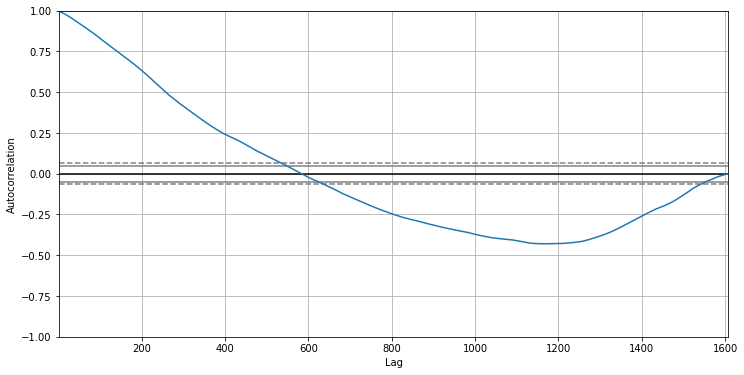

In [29]:
plt.rcParams.update({'figure.figsize':(12,6)})
autocorrelation_plot(df.Close.tolist())

### 3) Deseasoning the time series

#### a) Additive model

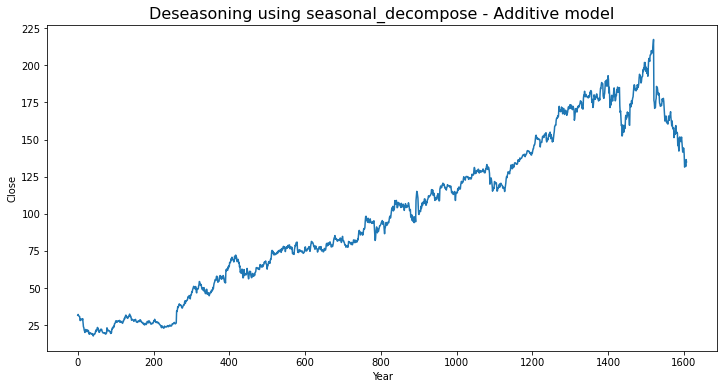

In [30]:
result_mul = seasonal_decompose(df['Close'], model='additive', freq = 6)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Additive model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

#### b) Multiplicative model

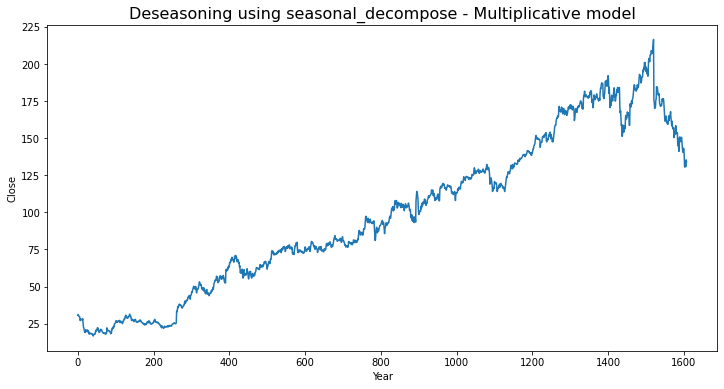

In [31]:
result_mul = seasonal_decompose(df['Close'], model='multiplicative', freq = 6)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Multiplicative model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

### 4) Seasonal Decomposition

#### a) From Scratch

In [32]:
df = df["Close"]
df.head()

0    31.730000
1    32.169998
2    31.469999
3    30.969999
4    30.809999
Name: Close, dtype: float64

Text(0.5, 1.0, 'Trend against Time')

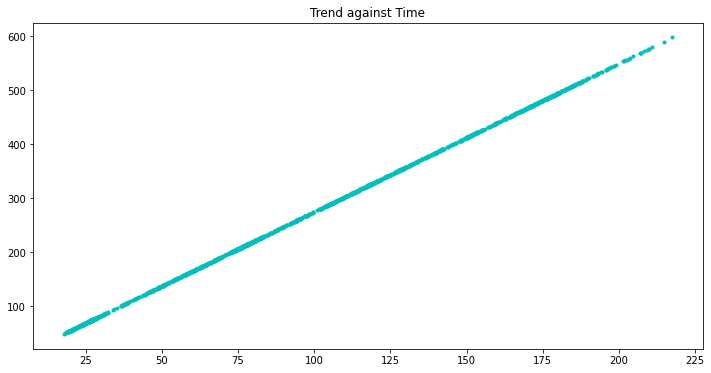

In [33]:
#create the trend component
T_Series = df
Trend = T_Series * 2.75

#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")

Text(0.5, 1.0, 'Seasonality against Time')

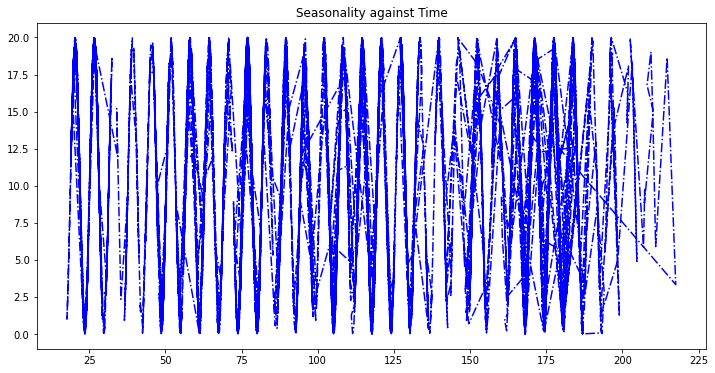

In [34]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

#plot the seasonality trend
plt.plot(T_Series,  seasonality, 'b-.')
plt.title("Seasonality against Time")

Text(0.5, 1.0, 'Residuals against Time')

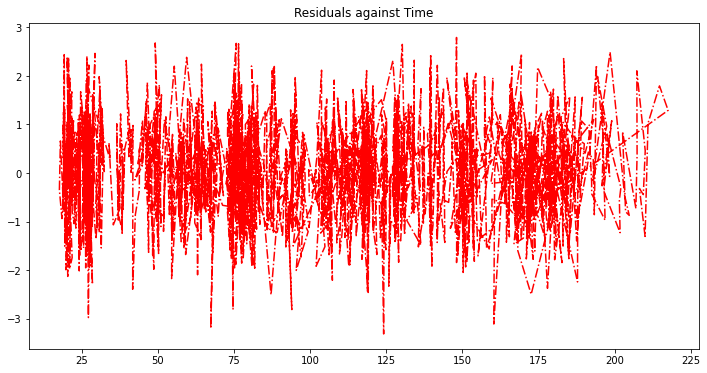

In [35]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")

Text(0.5, 1.0, 'Additive Time Series')

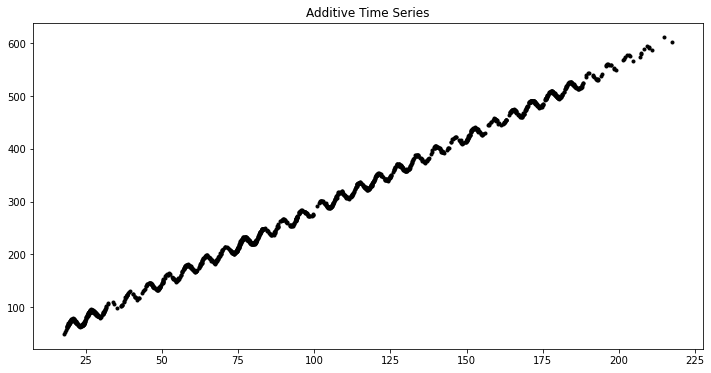

In [36]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")

Text(0.5, 1.0, 'Multiplicative Time Series')

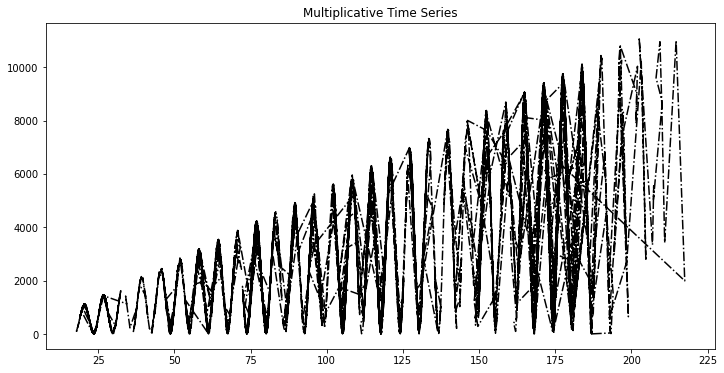

In [37]:
ignored_residual = np.ones_like(residual)

multiplicative_Tmodel = Trend * seasonality * ignored_residual

plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")

#### b) Using libraries

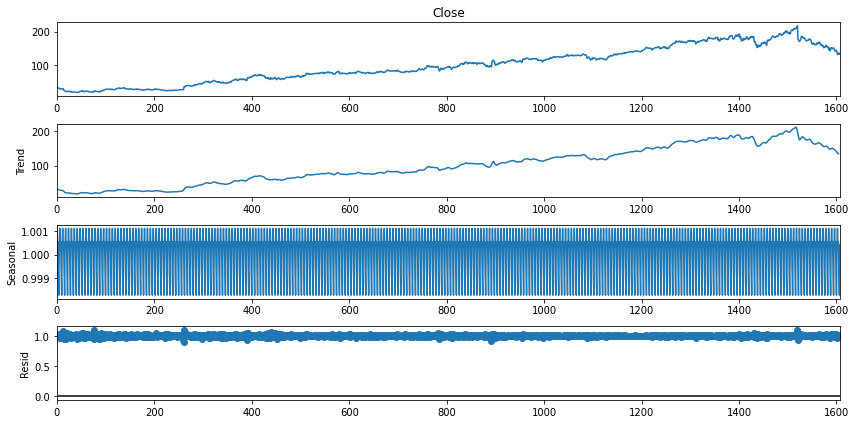

In [38]:
df = pd.read_csv(r'/content/sample_data/FB.csv',parse_dates=True)
result = seasonal_decompose(df['Close'], model='mul',freq =6) 
result.plot();

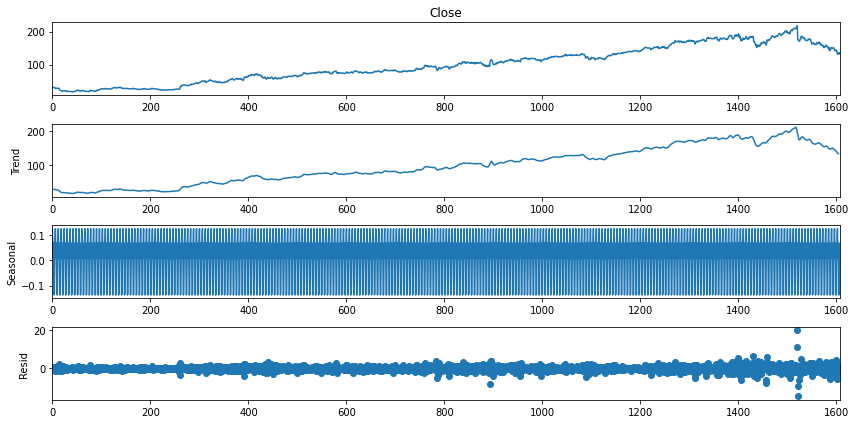

In [39]:
result = seasonal_decompose(df['Close'], model='add', freq =6) 
result.plot();

## Dataset 4: Milk Production

In [40]:
df = pd.read_csv(r'/content/sample_data/monthly-milk-production-pounds.csv',parse_dates=True)
df.head()

,Month,Monthly milk production: pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [41]:
df.isna().sum()

Month                                      1
Monthly milk production: pounds per cow    2
dtype: int64

In [42]:
df.dropna(inplace= True)
df.rename(columns = {'Monthly milk production: pounds per cow':'Milk_Prod'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      168 non-null    object 
 1   Milk_Prod  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


### 1) Multiple Box Plot

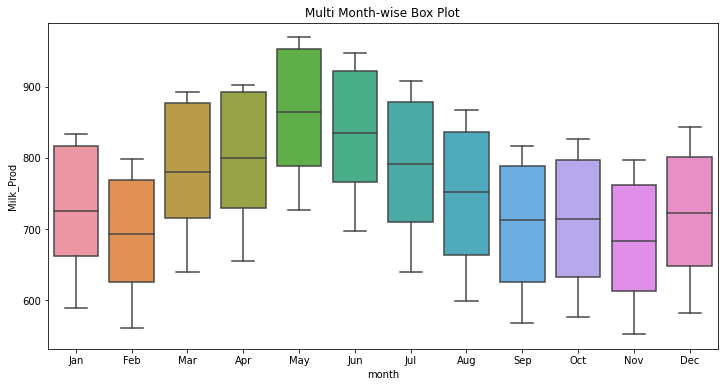

In [43]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
df['month'] = df['Month'].dt.strftime('%b')

df['year'] = [d.year for d in df.Month]

df['month'] = [d.strftime('%b') for d in df.Month]

years = df['year'].unique()
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='Milk_Prod', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### 2) Seasonality using auto correlation

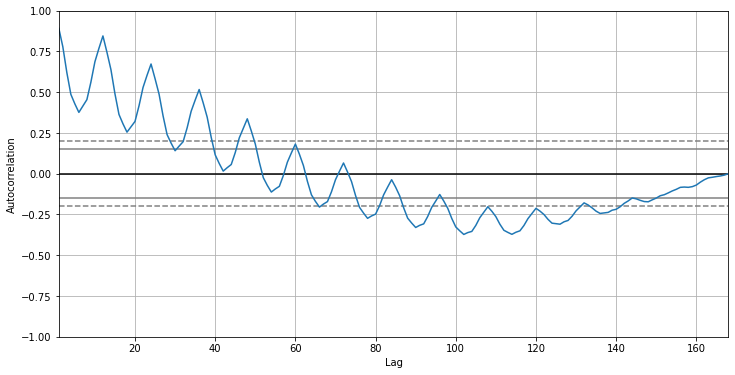

In [44]:
plt.rcParams.update({'figure.figsize':(12,6)})
autocorrelation_plot(df.Milk_Prod.tolist())

### 3) Deseasoning the time series

#### a) Additive model

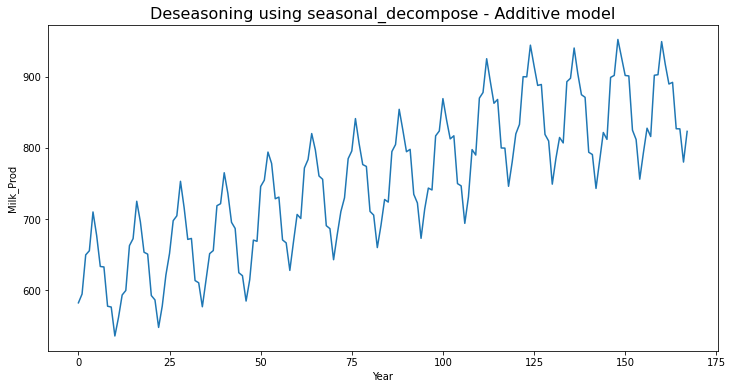

In [45]:
result_mul = seasonal_decompose(df['Milk_Prod'], model='additive', freq = 6)
deseason = df['Milk_Prod'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Additive model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Milk_Prod')
plt.show()

#### b) Multiplicative model

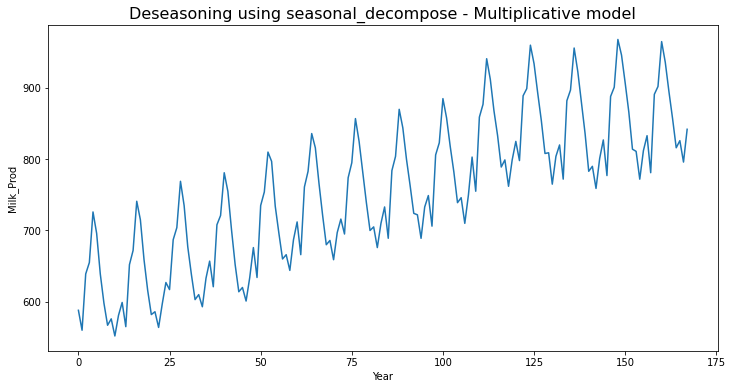

In [46]:
result_mul = seasonal_decompose(df['Milk_Prod'], model='multiplicative', freq = 6)
deseason = df['Milk_Prod'] - result_mul.seasonal
plt.figure(figsize=(12,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose - Multiplicative model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Milk_Prod')
plt.show()

### 4) Seasonal Decomposition

#### a) From Scratch

In [47]:
dtemp = df["Milk_Prod"]
dtemp.head()

0    589.0
1    561.0
2    640.0
3    656.0
4    727.0
Name: Milk_Prod, dtype: float64

Text(0.5, 1.0, 'Trend against Time')

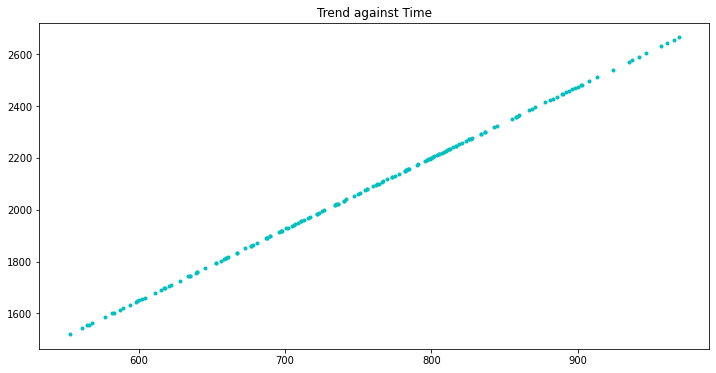

In [48]:
#create the trend component
T_Series = dtemp
Trend = T_Series * 2.75

#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")

Text(0.5, 1.0, 'Seasonality against Time')

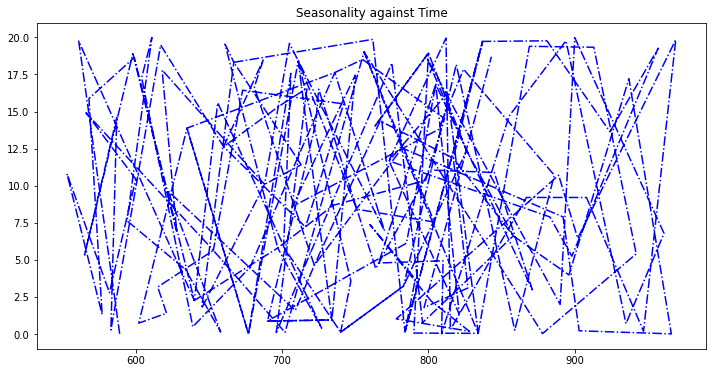

In [49]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

#plot the seasonality trend
plt.plot(T_Series,  seasonality, 'b-.')
plt.title("Seasonality against Time")

Text(0.5, 1.0, 'Residuals against Time')

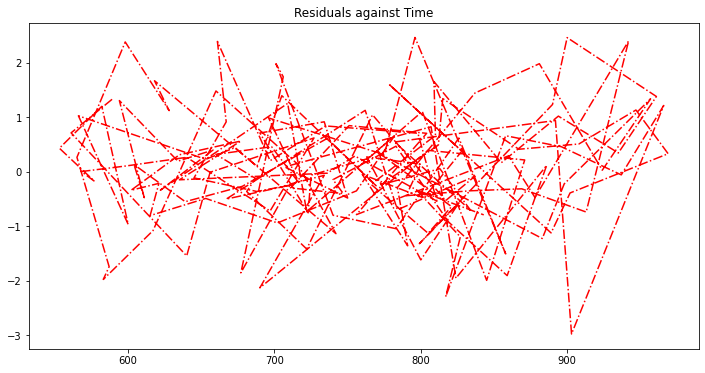

In [50]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")

Text(0.5, 1.0, 'Additive Time Series')

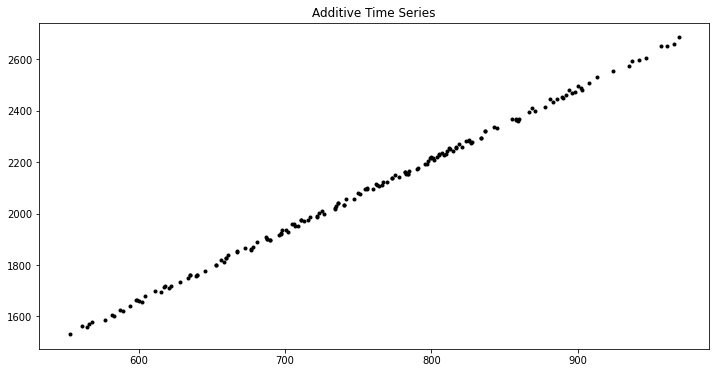

In [51]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")

Text(0.5, 1.0, 'Multiplicative Time Series')

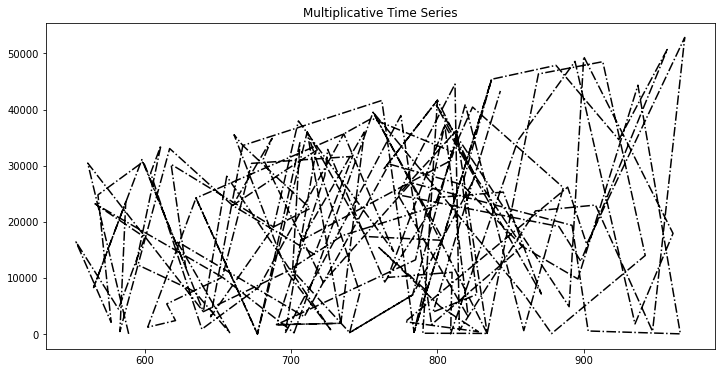

In [52]:
ignored_residual = np.ones_like(residual)

multiplicative_Tmodel = Trend * seasonality * ignored_residual

plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")

#### b) Using libraries

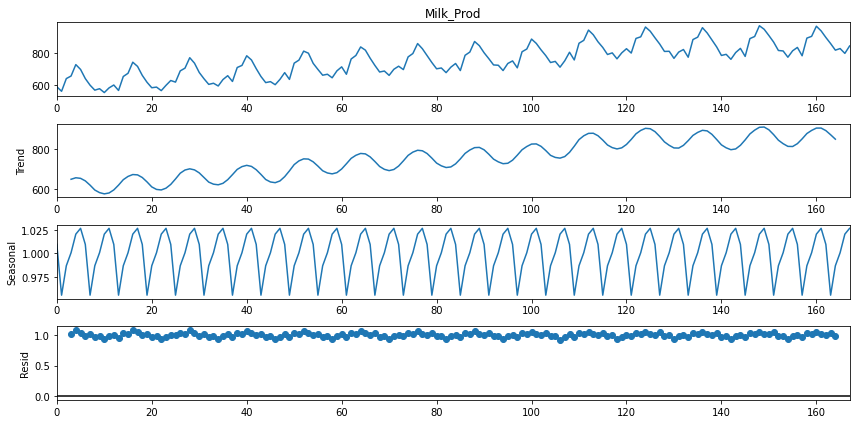

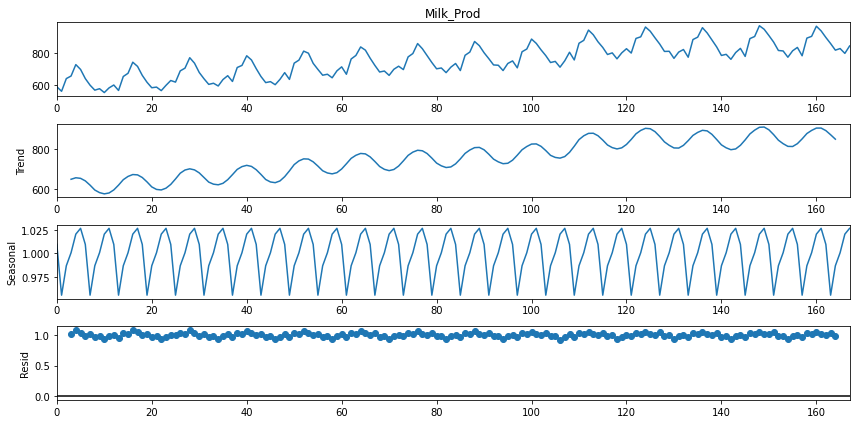

In [53]:
result = seasonal_decompose(df['Milk_Prod'], model='mul',freq =6) 
result.plot()

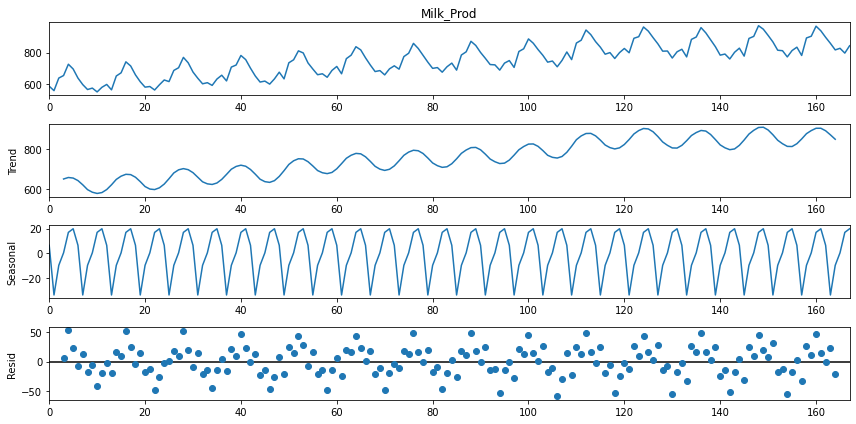

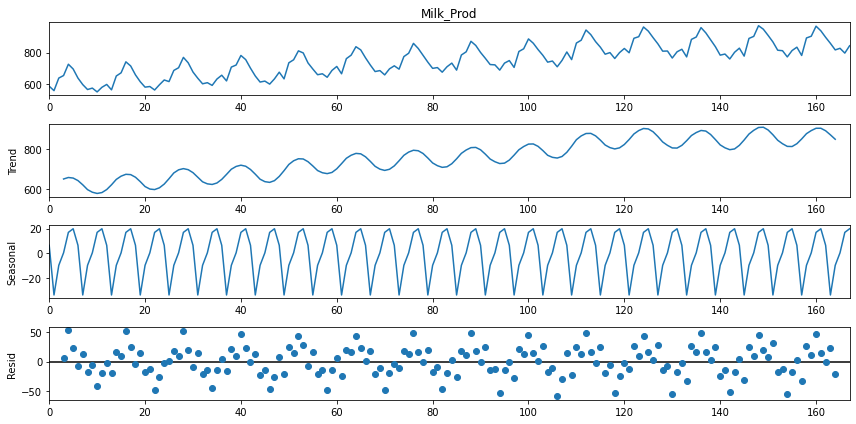

In [54]:
result = seasonal_decompose(df['Milk_Prod'], model='add', freq =6) 
result.plot()